# Initialize Preprocessing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Set Seaborn style
sns.set(style="whitegrid")

# Step 1: Load and Preprocess the Dataset

In [3]:
df = pd.read_csv('/content/Housing.csv')

In [4]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()


Missing Values:


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
# Encode categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [6]:
# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish')

In [7]:
# Remove outliers in price using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

In [8]:
# Standardize numerical features (exclude price)
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [9]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 2: Split Data into Train-Test Sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Simple Linear Regression (using area)

In [11]:
X_train_simple = X_train[['area']]
X_test_simple = X_test[['area']]
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)
y_pred_simple = simple_lr.predict(X_test_simple)

In [12]:
# Evaluate Simple Linear Regression
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
print("Simple Linear Regression (Area vs Price):")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.2f}")

Simple Linear Regression (Area vs Price):
MAE: 1281034.19
MSE: 2494502625574.46
R²: 0.28


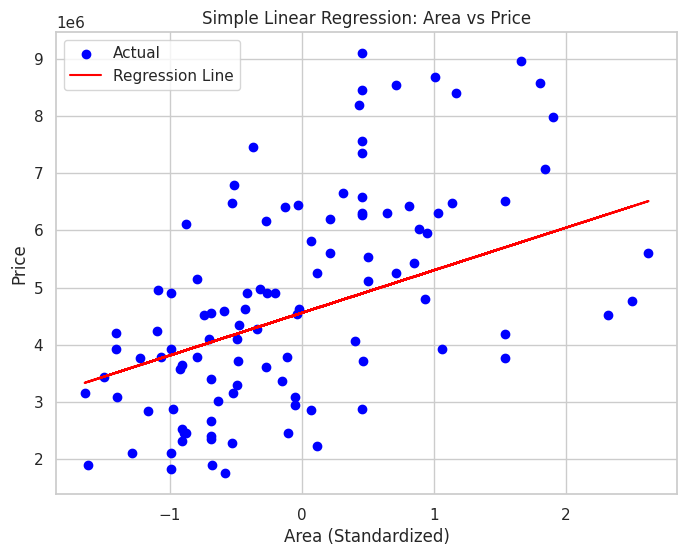

In [13]:
# Plot regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Area (Standardized)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

# Step 4: Multiple Linear Regression

In [14]:
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)
y_pred_multiple = multiple_lr.predict(X_test)

In [15]:
# Evaluate Multiple Linear Regression
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
print("\nMultiple Linear Regression:")
print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"R²: {r2_multiple:.2f}")


Multiple Linear Regression:
MAE: 784877.26
MSE: 1148203524699.75
R²: 0.67


In [16]:
# Interpret coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multiple_lr.coef_
})
print("\nMultiple Linear Regression Coefficients:")
print(coef_df)


Multiple Linear Regression Coefficients:
                   Feature    Coefficient
0                     area  414635.975050
1                 bedrooms   74138.941553
2                bathrooms  376701.117784
3                  stories  354760.451841
4                 mainroad  406359.434878
5                guestroom  379603.441698
6                 basement  316981.520631
7          hotwaterheating  799472.324288
8          airconditioning  763325.214818
9                  parking  142980.820837
10                prefarea  582649.815567
11       furnish_furnished  137976.522707
12  furnish_semi-furnished   52624.491931
13     furnish_unfurnished -190601.014638


# Step 5: Save Preprocessed Dataset

In [17]:
df.to_csv('/content/Housing-Regression.csv', index=False)
print("\nPreprocessed dataset saved as 'Housing-Regression.csv'")


Preprocessed dataset saved as 'Housing-Regression.csv'
